In [ ]:
 !wget --no-check-certificate \
  https://storage.googleapis.com/dataset-uploader/bbc/bbc-text.csv \
  -O /tmp/bbc-text.csv

--2021-08-05 11:03:57--  https://storage.googleapis.com/dataset-uploader/bbc/bbc-text.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.63.128, 142.250.31.128, 172.217.2.112, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.63.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5057493 (4.8M) [text/csv]
Saving to: ‘/tmp/bbc-text.csv’

/tmp/bbc-text.csv   100%[===================>]   4.82M  --.-KB/s    in 0.03s   

2021-08-05 11:03:58 (141 MB/s) - ‘/tmp/bbc-text.csv’ saved [5057493/5057493]



In [ ]:
 import pandas as pd
df = pd.read_csv('/tmp/bbc-text.csv')
df

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...
...,...,...
2220,business,cars pull down us retail figures us retail sal...
2221,politics,kilroy unveils immigration policy ex-chatshow ...
2222,entertainment,rem announce new glasgow concert us band rem h...
2223,politics,how political squabbles snowball it s become c...


In [ ]:
 category = pd.get_dummies(df.category)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns='category')
df_baru

,text,business,entertainment,politics,sport,tech
0,tv future in the hands of viewers with home th...,0,0,0,0,1
1,worldcom boss left books alone former worldc...,1,0,0,0,0
2,tigers wary of farrell gamble leicester say ...,0,0,0,1,0
3,yeading face newcastle in fa cup premiership s...,0,0,0,1,0
4,ocean s twelve raids box office ocean s twelve...,0,1,0,0,0
...,...,...,...,...,...,...
2220,cars pull down us retail figures us retail sal...,1,0,0,0,0
2221,kilroy unveils immigration policy ex-chatshow ...,0,0,1,0,0
2222,rem announce new glasgow concert us band rem h...,0,1,0,0,0
2223,how political squabbles snowball it s become c...,0,0,1,0,0


In [ ]:
 text = df_baru['text'].values
label = df_baru[['business', 'entertainment', 'politics', 'sport', 'tech']].values

In [ ]:
 from sklearn.model_selection import train_test_split
text_latih, text_test, label_latih, label_test = train_test_split(text, label, test_size=0.2)

In [ ]:
 from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(text_latih) 
tokenizer.fit_on_texts(text_test)
 
sekuens_latih = tokenizer.texts_to_sequences(text_latih)
sekuens_test = tokenizer.texts_to_sequences(text_test)
 
padded_latih = pad_sequences(sekuens_latih)
padded_test = pad_sequences(sekuens_test)

In [ ]:
 import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
 num_epochs = 30
history = model.fit(padded_latih, label_latih, epochs=num_epochs, 
                    validation_data=(padded_test, label_test), verbose=2)

Epoch 1/30
56/56 - 190s - loss: 1.6059 - accuracy: 0.2213 - val_loss: 1.5922 - val_accuracy: 0.2494
Epoch 2/30
56/56 - 187s - loss: 1.4187 - accuracy: 0.4337 - val_loss: 1.1862 - val_accuracy: 0.4337
Epoch 3/30
56/56 - 187s - loss: 0.9479 - accuracy: 0.6011 - val_loss: 0.9066 - val_accuracy: 0.6315
Epoch 4/30
56/56 - 186s - loss: 0.6610 - accuracy: 0.7309 - val_loss: 0.6426 - val_accuracy: 0.7371
Epoch 5/30
56/56 - 188s - loss: 0.3490 - accuracy: 0.8809 - val_loss: 0.6929 - val_accuracy: 0.7461
Epoch 6/30
56/56 - 189s - loss: 0.1532 - accuracy: 0.9466 - val_loss: 0.6522 - val_accuracy: 0.7865
Epoch 7/30
56/56 - 187s - loss: 0.0526 - accuracy: 0.9865 - val_loss: 0.7887 - val_accuracy: 0.7933
Epoch 8/30
56/56 - 189s - loss: 0.0422 - accuracy: 0.9876 - val_loss: 0.8258 - val_accuracy: 0.7775
Epoch 9/30
56/56 - 188s - loss: 0.0410 - accuracy: 0.9893 - val_loss: 0.7423 - val_accuracy: 0.8067
Epoch 10/30
56/56 - 185s - loss: 0.0438 - accuracy: 0.9882 - val_loss: 0.9268 - val_accuracy: 0.7663

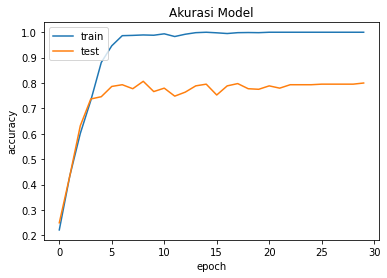

In [ ]:
 import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

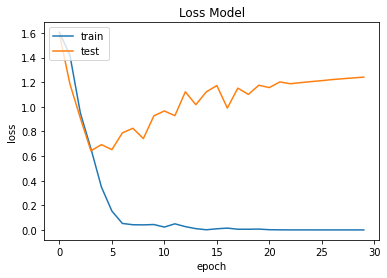

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()